In [53]:
import json
import yaml
import matplotlib.pyplot as plt

def plotFormFactor(expFormFactor,k):
    xValues = []
    yValues = []
    for i in expFormFactor:
        xValues.append(i[0])
        yValues.append(k*i[1])
    plt.plot(xValues,yValues)

def plotOrderParameters(OPsim, OPexp):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(key)
            yValuesSN1sim.append(OPsim[key][0][0])
            yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(key)
            yValuesSN2sim.append(OPsim[key][0][0])
            yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key:
            xValuesHG.append(key)
            yValuesHGsim.append(OPsim[key][0][0])
            yValuesHGexp.append(OPexp[key][0][0])
    #print(xValues,yValues)
    plt.plot(xValuesHG,yValuesHGsim)
    plt.plot(xValuesHG,yValuesHGexp)
    plt.show()
    plt.plot(xValuesSN1,yValuesSN1sim)
    plt.plot(xValuesSN1,yValuesSN1exp)
    plt.show()
    plt.plot(xValuesSN2,yValuesSN2sim)
    plt.plot(xValuesSN2,yValuesSN2exp)
    plt.show()

    
DataBankPath = '../../Databank/Data/'
SystemPath = 'Simulations/6a7/ee8/6a7ee8ec651f41dbaa4460d095ad2e30b27de20b/9b33210b33f94f175df15b16f5064d9464900b05/'
path = DataBankPath + SystemPath
lipid = 'POPC'
FFpathSIM = path + 'FormFactor.json'
OPpathSIM = path + lipid + 'OrderParameters.json'
READMEfilepath = path + '/README.yaml'
FFQualityFilePath = path + '/FormFactorQuality.json'

with open(READMEfilepath) as yaml_file:
    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)

with open(FFpathSIM) as json_file:
    FFsim = json.load(json_file)
    
with open(FFQualityFilePath) as json_file:
    FFq = json.load(json_file)
    
FFpathEXP =  DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/formfactor_chol0_FormFactor.json'
with open(FFpathEXP) as json_file:
    FFexp = json.load(json_file)
    
with open(OPpathSIM) as json_file:
    OPsim = json.load(json_file)

expOPfolder = list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values())[0]
OPpathEXP =  DataBankPath + 'experiments/OrderParameters/' + expOPfolder + '/' + lipid + '_Order_Parameters.json'
with open(OPpathEXP) as json_file:
    OPexp = json.load(json_file)


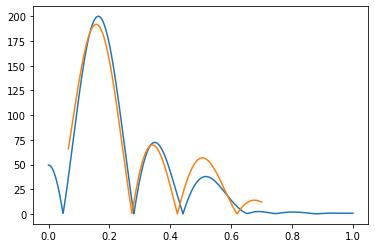

In [7]:
plotFormFactor(FFsim,1)
plotFormFactor(FFexp,FFq[1])

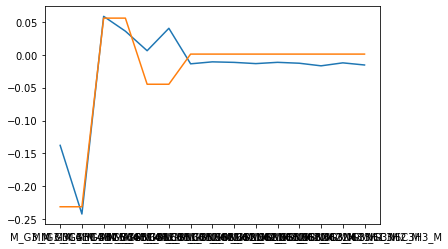

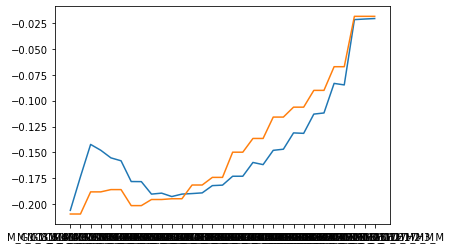

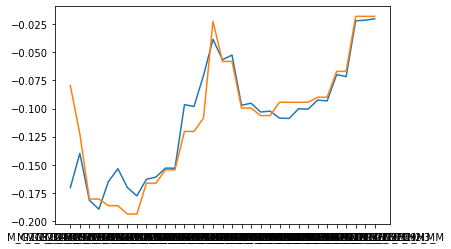

In [54]:
plotOrderParameters(OPsim, OPexp)
#print(OPsim)
#plt.plot(OPsim[1])

In [50]:
OPexp

{'M_G3N6C3_M M_G3N6C3H1_M': [[0.00111083]],
 'M_G3N6C3_M M_G3N6C3H2_M': [[0.00111083]],
 'M_G3N6C3_M M_G3N6C3H3_M': [[0.00111083]],
 'M_G3N6C2_M M_G3N6C2H1_M': [[0.00111083]],
 'M_G3N6C2_M M_G3N6C2H2_M': [[0.00111083]],
 'M_G3N6C2_M M_G3N6C2H3_M': [[0.00111083]],
 'M_G3N6C1_M M_G3N6C1H1_M': [[0.00111083]],
 'M_G3N6C1_M M_G3N6C1H2_M': [[0.00111083]],
 'M_G3N6C1_M M_G3N6C1H3_M': [[0.00111083]],
 'M_G3C5_M M_G3C5H1_M': [[-0.04478707]],
 'M_G3C5_M M_G3C5H2_M': [[-0.04478707]],
 'M_G3C4_M M_G3C4H1_M': [[0.05589248]],
 'M_G3C4_M M_G3C4H2_M': [[0.05589248]],
 'M_G3_M M_G3H1_M': [[-0.23134863]],
 'M_G3_M M_G3H2_M': [[-0.23134863]],
 'M_G2_M M_G2H1_M': [[-0.20691616]],
 'M_G1_M M_G1H1_M': [[-0.14991575]],
 'M_G1_M M_G1H2_M': [[0.0]],
 'M_G1C3_M M_G1C3H1_M': [[-0.20987741]],
 'M_G1C3_M M_G1C3H2_M': [[-0.20987741]],
 'M_G1C4_M M_G1C4H1_M': [[-0.18840908]],
 'M_G1C4_M M_G1C4H2_M': [[-0.18840908]],
 'M_G1C5_M M_G1C5H1_M': [[-0.18619612]],
 'M_G1C5_M M_G1C5H2_M': [[-0.18619612]],
 'M_G1C6_M M_G1C6H1

In [25]:
readme

{'DOI': '10.5281/zenodo.13498',
 'SOFTWARE': 'gromacs',
 'TRJ': [['50WperL_40ns.xtc']],
 'TPR': [['50.tpr']],
 'PREEQTIME': 50,
 'TIMELEFTOUT': 0,
 'COMPOSITION': {'POPC': {'NAME': 'POPC',
   'MAPPING': 'mappingPOPCMaciejewskiRog1.txt',
   'COUNT': [144, 144]},
  'SOL': {'NAME': 'SOL', 'MAPPING': 'mappingSPCwater.txt', 'COUNT': 14400}},
 'DIR_WRK': '/usr/home/bort/Databank',
 'PUBLICATION': '10.1101/2020.11.09.374850; 10.1021/acs.jpcb.5b04878',
 'AUTHORS_CONTACT': 'Javanainen, Matti',
 'SYSTEM': '288POPC_14400SOL_298K',
 'SOFTWARE_VERSION': '4.5.5',
 'FF': 'MacRog',
 'FF_SOURCE': None,
 'FF_DATE': None,
 'CPT': None,
 'LOG': None,
 'TOP': None,
 'TRAJECTORY_SIZE': 1204937780,
 'TRJLENGTH': 40010.0,
 'TEMPERATURE': 298.0,
 'NUMBER_OF_ATOMS': 81792,
 'DATEOFRUNNING': '17/01/2022',
 'TYPEOFSYSTEM': 'lipid bilayer',
 'EXPERIMENT': {'ORDERPARAMETER': {'POPC': {'10.1039/c2cp42738a': '10.1039/c2cp42738a/1'}},
  'FORMFACTOR': 'unpublished/NMRlipidsIII/1'}}